# Sequence Analysis

## Table of content

1. [Sequence Analysis](#Sequence-Analysis)
   1. [Table of content](#Table-of-content)
2. [Basics](#Basics)
3. [Dotblots](#Dotblots)
   1. [Parameters Window Size and Allowed Error](#Parameters-Window-Size-and-Allowed-Error)
   2. [Substitution matrices and threshold](#Substitution-matrices-and-threshold)
   3. [Online tools to create Dotblots](#Online-tools-to-create-Dotblots)
      1. [Emboss dotmatcher](#Emboss-dotmatcher)
      2. [vector builder](#vector-builder)
      3. [dotlet](#dotlet)
4. [Alignments](#Alignments)
   1. [Pairwise Alignments](#Pairwise-Alignments)
      1. [Global Alignments](#Global-Alignments)
      2. [Local Alignments](#Local-Alignments)
      3. [Semi-Global Alignments](#Semi-Global-Alignments)
   2. [Quality of an Alignment](#Quality-of-an-Alignment)
      1. [Score](#Score)
      2. [Editing distance](#Editing-distance)
   3. [Substitution matrices](#Substitution-matrices)
      1. [PAM matrices](#PAM-matrices)
      2. [BLOSUM matrices](#BLOSUM-matrices)
   4. [Gap costs](#Gap-costs)
5. [Exercises](#Exercises)
   1. [Exercises 1-3](#Exercises-1-3)
   2. [Exercise 4 - Calculating Alignments](#Exercise-4---Calculating-Alignments)
   3. [Exercise 5 - Optimal Alignment](#Exercise-5---Optimal-Alignment)

# Basics

From a bioinformatic standpoint sequences are just big strings.

General limitations to keep in mind:

- normally we have no/limited knowledge about the sequences we work with
- most tools were developed with protein sequences in mind and were later changed to be able to work with nucleotides as well

Standard approach of sequence analysis:

- start with a database search (FastA or BLAST)
- create a Multiple sequence Alignemtn (e.g. ClustalW)
- then do some pair-wise Alignment (e.g. Needleman-Wunsch)
- create a graphical comparison of your sequences using a dotblot

Relations between sequences can be:

- Homologs (sequences that developed from a common ancestor)
   - orthologs (homologs in different species, mostly retain their function)
   - paralogs (homologs in the same species, often develop new functions)

Important terms:

- Identity = amount of *identical* letters in an Alignment; amount of matches
- Similarity = amount of similar amino acids (similar physico-chemical properties, e.g. Phe and Tyr)

# Dotblots

Comparison of biological sequences. Both sequences are applied to the horizontal and vertical axis of a diagram and matches between a column and a row are marked with a point (or line) at the specific intersection

This is an example of a Sequence being compared to itself:

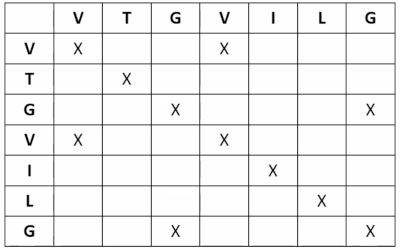

Meaning of the patterns (see powerpoint for example images):

- Long diagonal lines in a DotPlot refer to long stretches of identical (similar) letters in both sequences
- The most important diagonal is the main diagonal going from the top left corner to the bottom right corner, since it represents the letter by letter comparison of both sequences
- Breaks in these diagonals indicate “gaps”, that means regions were one sequence does not match the other sequence (This is mainly true if the diagonal continues afterwards)
- Multiple parallel diagonals refer to repeating parts of the sequences, e.g. domains
- Big blocks of Dots refer to “low complexity regions”, e.g. poly Alanine (AAAAAA) or repeats


## Parameters Window Size and Allowed Error

There are two main parameters that can be adjusted in Dotplots to reduce noise. Keep in mind that the Dotblot is usally done *after* the pairwise alignment, i.e. we already know identiy and similarity of the sequences

- Window size (W)
  - how many letters of both sequence to compare at once
  - goes frame by frame in the defined size and draws a line if all letters if the subset are identical
  - window sizes: proteins 10-15, Nucleotides 20-30
  - all comparisons are done, i.e. I go one letter further in the column every comparison and compare all to the first chunk in the rows, then I again go over one step at a time in the columns and compare it all to the rows one letter down and so on. Comparisons done: orange, red, blue, green
  - if windows overlap the line is elongated

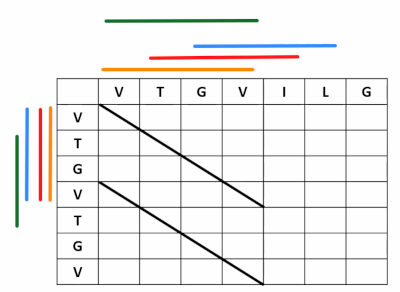

- Allowed Errors (E or S)
  - Number of mismatches allowed in Window size
  - can only be used in combination with window size
  - good starting values for proteins 3-6 or for nucleotides 5-10
  - Example: a windowsize of 4 with 1 Error allowed
     - the diagonal is elongated in this example since TGVI (columns) and TGVT (row) are also an accepted comparison with only one difference
     - since the two accepted windows overlap the diagonal is elongated
- most often this is replaced by the substitution matrix and a threshold

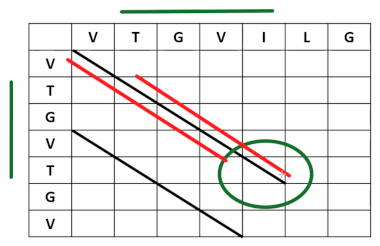

## Substitution matrices and threshold

To model similarities between amino acids that are different, but have the same properties, substitution matrices are used. 

- The values in these matrices can be positive or negative, usually between -12 and 12.
- in each window the sum of the comparisons is calculated and compared to a determined threshold
- e.g. to compare TGVI and TGVT we compare T/T G/G V/V and I/T, we get a number for each comparison, sum them up and if the number is above a certain threshold we accept the comparison
- the thresholf for a window of 10 could e.g. be 23







## Online tools to create Dotblots

### Emboss dotmatcher

https://www.ebi.ac.uk/jdispatcher/seqstats/emboss_dotmatcher

- for protein or nucleotide sequences
- Parameters:
    - Matrix: which substitution matrix to use
       - BLOSUM62 is standard
       - The numbers refer to sequence identity, i.e. how identical are the two sequences we compare 
    - Window size (see above)
    - threshold of substitution sum

### vector builder

https://en.vectorbuilder.com/tool/sequence-dot-plot.html

- for nucleotide sequences only
- you have to copy and paste the sequence
- options:
   - Window size
   - mismatch limit
   - doesn't contain any Substritution matrices, since we only compare nucleotides
- output includes forward and reverse complement, this means that ince they are looked at from the beginning and once from the back, i.e. one sequence is looked at from the back and the other from the front
- also shows levels of homology in percent
- save image through right click

### dotlet

https://dotlet.vital-it.ch 

- click on the sequences and names to change them
- Window size and scoring matrix can be adjusted at the top
- at the bottom right are two scrollbars that have to be adjusted
   - the top one until the end of the blue bell curve (= histogramm of how often a certain score occurs) (~35%) (lower threshold)
   - the lower one until ca 60-70% (upper threshold)
   - these are approximate values that have to be adjusted
- includes a scrollable sequence viewer so we can immediately compare the sequences
   - can be accessed by moving the red bars in the plot or with the bars at the bottom
   - absolute matches are highlighted in the sequence viwer
- to download the image there is a print button at the top (this is broken at the moment, so just screenshot)
- based on Javascript

# Alignments

Alignments are used to compare sequences based on their amino acids/nucleotides. It is in itself an abstract measure for similarity

When two sequences are aligned (= pairwise alignment) there are three possibilties:

- letter - letter (same or different)
  - match (conservation)
  - mismatch (point mutation)
- letter - nothing
  - INDEL (insertion or deletion) 
- nothing - letter
  - INDEL (insertion or deletion)

When more than two sequences are aligned we talk aout Multiple Sequence Alignments (MSAs)

## Pairwise Alignments

There are different types of pairwise alignment with specific uses, often different methods are used to determine the best for a specific case.

### Global Alignments

- first and last letters of both sequences are aligned at all times, even if they don't match
- the remaining aa are shifted to reach highest similarity
- used for sequences close in length (+/- 10% maximum length difference)
- allows to compare the whole sequences
- e.g. Needleman-Wunsch

### Local Alignments

- shows only the part of the sequences that match best with each other
- used to compare only parts of the sequences (e.g. similar conserved domains in otherwise very different proteins)
- can be problematic if the sequences are too different
- should have at least 50% similarity in the domain parts

### Semi-Global Alignments

- used when one sequence is much shorter than the other, compares the shorter to the longer
- the shorter sequence is aligned completely to a part of the longer sequence
- especially useful to compare one-domain proteins with sequences of multidomain proteins



## Quality of an Alignments

There are two ways to determine the qualtiy: score and editing distance. Both use the concept of costs, which occur for match, mismatch or gap, but it is *not possible to compare score and editing distance* even of the same sequences 

- Match/Mismatch cost
  - fixed number or taken from substitution matrix
- Gap cost
  - fixed number or calculated according to a function dependent on the length of the gap

The costs are arbitrary but oriented on the likelihood of their occurrence calculated by comparing known sequences.

### Score

- matches are giving positive numbers
- mismatches and gaps negative numbers
- we look for the highest possible score
- it is possible to compare scores for different alignments *of the same two sequences*
- it is *not possible* to compare the scores for the alignments of *different* sequences, since the score is highly dependent on sequence length (and aa content in case of a subsitution matrix)

### Editing distance

- match has a cost of 0
- mismatches/gaps have a positive cost
- we look for the smallest possible editing distance

## Substitution matrices

- replace constant costs with variable costs for all possibe letter combinations
- take into account
  -  Amino acids have different probabilities to mutate into one another
  -  A Substitution matrix saves these values:
     - High positive number: probable mutation
     - High negative number: improbable mutation
     - 0: neutral mutation
   
### PAM matrices

PAM = point accepted mutation, created by Martha O. Dayhoff

- calculation based on >1500 observed mutations in >60  sequences of closely related proteins (>85% identiy)
- Counted the number of mismatches between all aa, e.g. how often is Phe matched with Tyr, for all aa combinations
- Frequency = how often is a particular aa present in all sequences
- Mutability = how often is a particular aa mutated

Using the counts, the frequency and mutability the PAM1 matrix was calculated, on which all other PAM matrices are based. All other PAM matrices are calculated using interpolations of the values of PAM1

- assumptio: If these two proteins are related, the evolutionary interval separating them is the time taken for n point accepted mutations to occur per 100 amino acids
- the higher the number of PAM the lower the identity between the sequences
- with unknown sequences start somewhere in the middle, when you have an idea of the % identity rerun the analysis to get the best results
- identity <25% is the "twilight zone" be very critical of the result of the Alignment here

|PAM|% identity|
|--|--|
|0|100|
|30|75|
|80|50|
|110|40|
|200|25|
|250|20|

If possible use BLOSUM matrices not PAM matrices

### BLOSUM matrices

BLOSUM = BLOcks SUbstitution Matrix

- score alignments between evolutionary divergent protein sequences
- based on local alignments (rather than global as PAM)
- used the BLOCKS database, which contains sequence alignments for conserved protein domains they were able to get local Alignments without any gaps in them
- general process similar to PAM
- log-odds scores weree calculated for all aa combinations
- different BLOSUM matrices: the higher the number the more closely related the sequences
  - BLOSUM80 for closely related BLOSUM45 for distantly related proteins
- the numbers also reflect the source material, e.g. BLOSUM 62% was built using sequences with >= 62% identity
- each BLOSUM matrix has its own alignment basis, which is always newer and more divers than the PAM matrices

## Gap costs

In practise we don't assign linear gap costs (every gap has the same cost, irresoective of position or length) but *affine* gap costs

- the first letter is assigned a very high cost
- a gap spanning more than one letter the 2nd to nth letter are assigned a smaller cost, i.e. multiple small gaps are more expensive than one large one

Formular for affine gap costs:

- where `G(k)` is the cost for a specifc gap
- `k` is the length of the gap
- `a` and `b` are pre-defined constants with `a` being the so-called gap-open cost and `b` being the so called gap-extension cost

```
G(k) = a + bk
```

Other gap cost calculations are the logarithmic Gap cost or the log-affine Gap cost

```
logarithmic gap cost:
G(k) = a + c ln(k)
```


## Calculating Pairwise alignments

Only optimal pairwise alignments are useful, it is therefore necessary to find the best of all possible alignments.

- brute force algorithm
  - calculate *all* possible scores and pick the best
  - this gets out of hand *very* quickly and is in short impossible
- most effective way is visualizing all alignments as matrix (similar to dotplot), but instead of dots we have the score of the letter combination
- each path is a score we want the path with the highest score
- Needleman-Wunsch used a recursive dynamic programing approach to find the optimal path
  - separated the whole into smaller fragments and using the solutions of the smaller fragments to fin the optimal solution overall
  - especially useful for global alignments

### Needleman-Wunsch Algorithm for global alignment

- used for global alignments
- uses a dynamic programminapproach using recursive matrix creation
- two steps to the algorithm
  1. Create an alignment matrix
     - the matrix consists of the two sequences at the left and the top axis preceded by one empty row and column
     - the score for each cell is calculated by using the scores of the neighboring cells to the left (introducing a gap in the sequence at the top), top (introducing a gap in the sequence on the left) or top-left (going along a diagonal, i.e. along the sequence and aligning the two letters in the sequences)
     - this gives three potential scores of which the highest is used
     - the thought is that we can either align the two sequences (diagonal) or introduce a gap in on of them (either top or left)
     - going diagonal the score added is taken from the substitution matrix, going from the top of from the left takes the score from the Gap cost
     - we save the paths that create the highest scores, so those are already a lot fewer than every possibility
  2. search the optimal way through using a back-tracking algorithm
     - now we go from the topleft to the bottomright along the paths to find the overall highest score adding up the scores along the way
     - this we do *backwards*  as it drastically reduces the possibilites (like solving a labyrinth from the exit to the inside)
     - if we come across a field that has two options we pick the one that has the better score (just at this one level)
- see ppt for an example (the example using a fixed gap cost of -6)

### Semi-Global Alignments

- the algorithm for the semi-global alignment follows similar prinicples, with a few notable differences
- the first row and column are always filled with 0
- the backtracking doesn't start in the bottom right corner, but at the highest score in the last column or last row (wherever the highest score is)
- the backtracking doesn't (have to) go to the very top left corner, but stops as soon as the first column or row is reached

### Smith-Waterman Algorithm for local alignment

- again follows the logic of Needleman-Wunsch with some differences:
- during grid creation the lowest possible score is 0 (negative values are replaced by 0)
- only paths leading to scores >0 are saved
- traceback starts at the highest overall score inside the whole matrix
- traceback ends as soon as we hit a 0
- if there are several fields with the same highest score we do the traceback for them all and use the highest score in the end

## Analyzing Alignments

- it is not possible to compare alignments of different sequences
- it is not possible to compare alignment scores with editing distances

Main outputs of an alignment:

- Length: Number of columns in the Alignment, should be near the length of the longer sequence
- Identity: Number of matches, should be as high as possible
- Similarity: Number of mismatches of similar amino acids, should be as high as possible
- Gaps: Number of letters aligned to nothing, should be as low as possible
- Overall Score: Sum of all match, mismatch and gap costs over the whole Alignment, should be as high as possible

Further outputs:

1. The amount of gaps
2. The placement of gaps, inside our outside of specific domains
3. Regions with a disproportionately large amount of matches
4. Influence of Low-complexity regions
5. Comparing the Alignment to a secondary structure prediction

## Online tools to create Alignments

### EMBOSS needle - global alignment

- EMBOSS Needle creates an optimal global alignment of two sequences using the Needleman-Wunsch algorithm.

https://www.ebi.ac.uk/jdispatcher/psa/emboss_needle

### EMBOSS Water - local alignment

- EMBOSS Water uses the Smith-Waterman algorithm (modified for speed enhancements) to calculate the local alignment of two sequences.

https://www.ebi.ac.uk/jdispatcher/psa/emboss_water

# Exercises

## Exercises 1-3

See powerpoint with results

## Exercise 4 - Calculating Alignments

Use the scoring schemes below to calculate the overall costs for the following four Alignments:

```
KRATZEN   FAULTIER   SCHAUKA_STEN   UNITEDST__ATES
K_ATZEN   FAULPELZ   SCHAUFENSTER   UNITEDEMIRATES
```

Use the following Costs: Match = M, Mismatch = I, Gap = G

- Editing distance: Match 0; Mismatch 2; Gap 3
- Score: Match 2; Mismatch -2; Gap -3

|Comparison|Editing distance<br/>(smaller is better)|Score<br/>(bigger is better)|
|---|---|---|
|`MGMMMMM`|3|9|
|`MMMIII`|8|0|
|`MMMMMIIGMMMI`|9|7|
|`MMMMMMIIGGMMMM`|10|10|

The scores cannot be compared!!!!

## Exercise 5 - Optimal Alignment

Calculate the optimal Alignments for the following three pairs of Strings:

S1 = “TRACTOR” & S2 = “RACER”
S1 = “WORLD” & S2 = “CROWD”
S1 = “SKELETON” & S2 = “EXPLOSION”

Use the following costs: Match= 5, Mismatch= -2 and Gap= -3

```
TRACTOR     WORL_D    SKELET_ON
_RAC_ER     _CROWD    EXPLOSION

TRACTOR     WOR_LD
_RACE_R     _CROWD
  
            WORL_D
            C_ROWD

            WOR_LD
            C_ROWD

           and more

Score 12   Score 0    Score 9
````

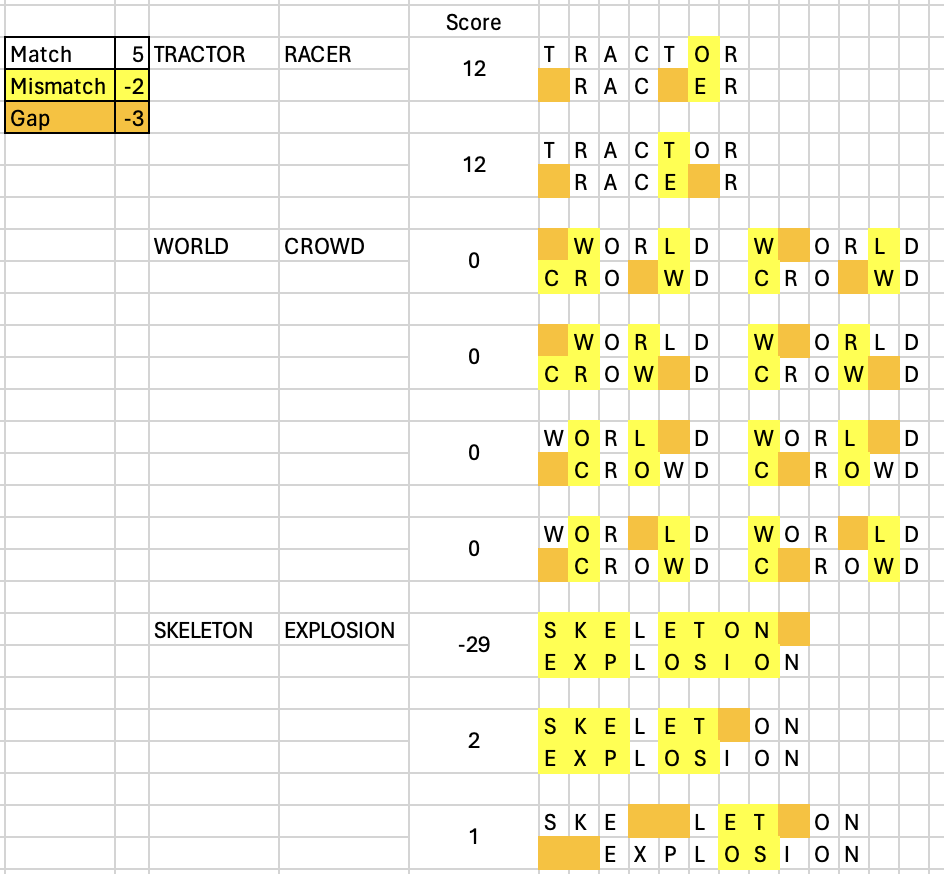


## Exercise 6 - TRUD domains again

During the Dotplot part you compared four sequences carrying a TRUD Domain (M3Z3I3.fasta, Q96PZ0.fasta, A0A5N3XQ52.fasta and A0A9D3NLI7.fasta)

- Use these sequences to run pairwise Alignments using EMBOSS Needle and EMBOSS Water to compare the sequence Q96PZ0.fasta to the other three (6 Alignments in total)
- Make sure to adjust the matrix to fit your results
   - Start with BLOSUM62 and look at the calculated identity
   - Afterwards restart the Alignment with a different matrix, BLOSUM90 for example
- How do the results differ between the two tools?
- Which sequence is the most similar one to Q96PZ0.fasta?

See Excel sheet with overview

## Exercise 7 - Best Alignment

Use the sequences XP_039961828.fasta and NP_477249.fasta to calculate a pairwise Alignment using EMBOSS Needle with the default parameters
- Calculate the same Alignment while using matrices BLOSUM40 and BLOSUM45
- Which of the three matrices you used produced the best Alignment?
- Afterwards use the matrix that produced the best result to calculate new Alignments but this time adjust the gap penalties as follows:
   - gap_open penalty = 5, gap_extend penalty = 0.5
   - gap_open penalty = 1, gap_extend penalty = 0.5
   - gap_open penalty = 1, gap_extend penalty = 0
- Which of the four Alignments do you think is the best one?

See Excel sheet